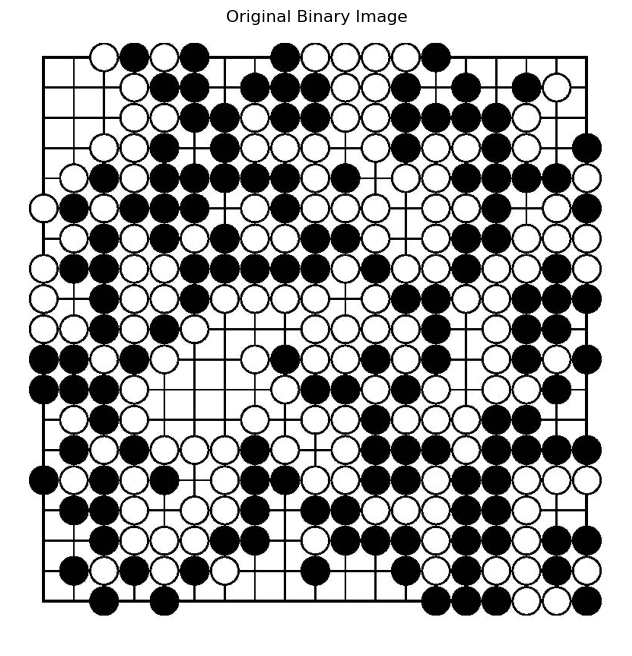

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

binary_img = io.imread('L6/go.jpg', as_gray=True)

# 显示原始二值图像
plt.figure(figsize=(8, 8))
plt.imshow(binary_img, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')
plt.show()

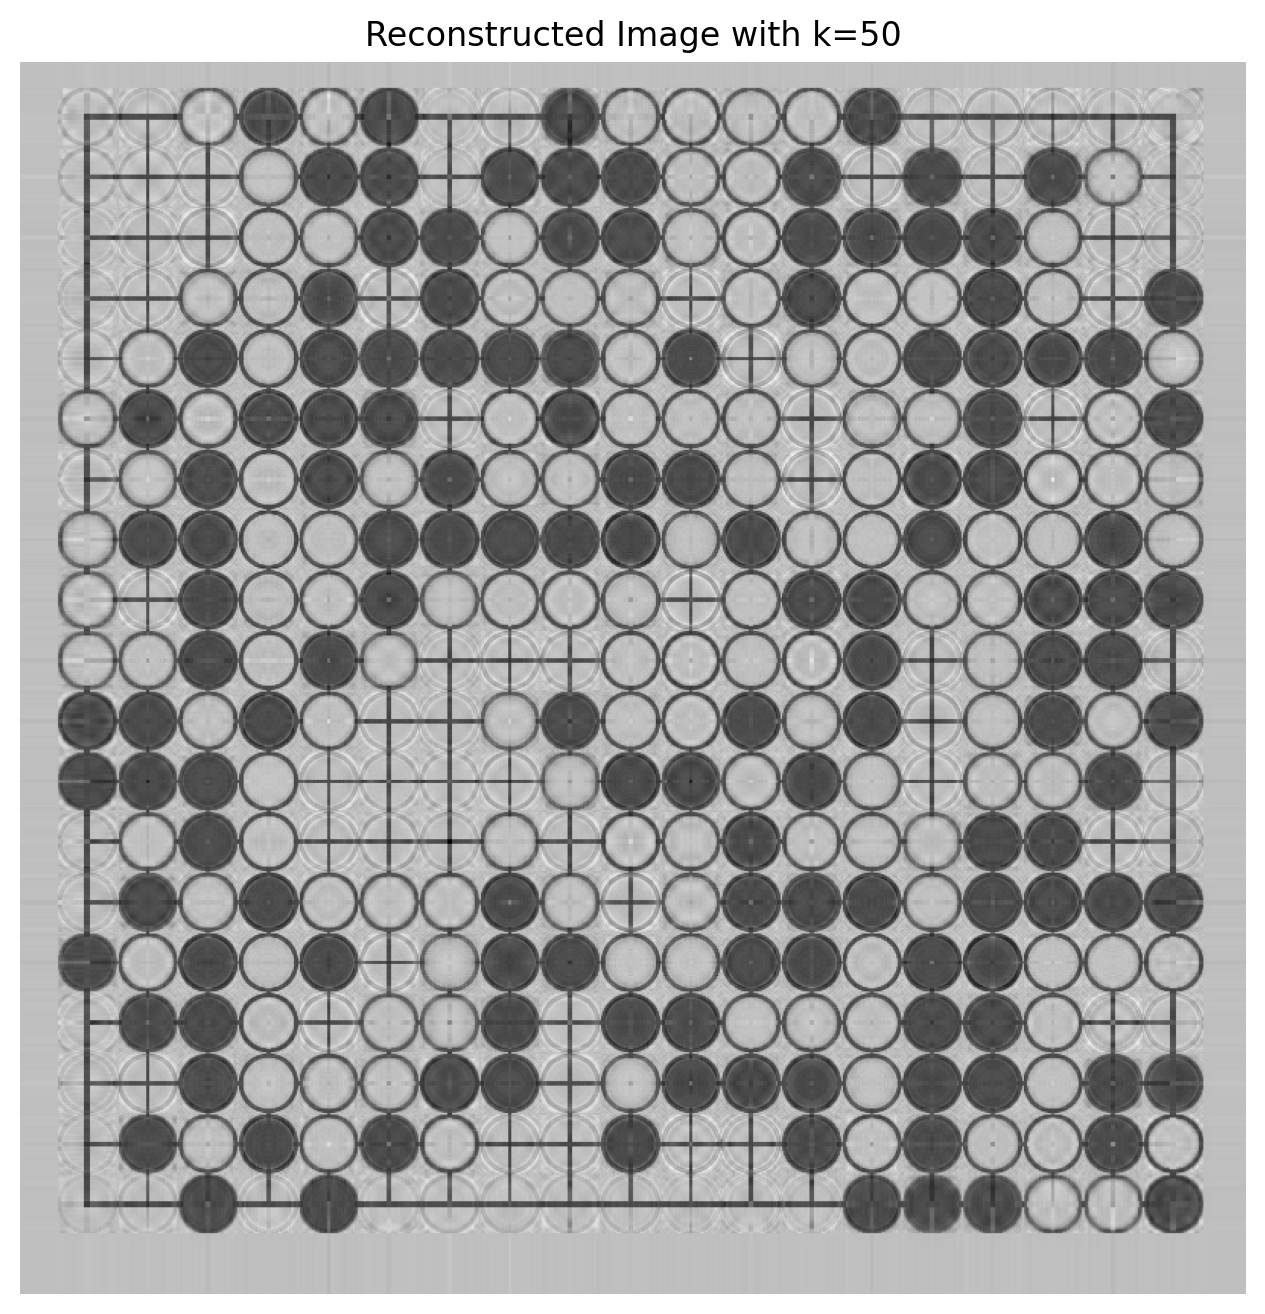

In [15]:
# 对二值图像进行SVD分解
U, S, VT = np.linalg.svd(binary_img, full_matrices=False)

# 选择前k个奇异值进行压缩
k = 50
compressed_img = np.dot(U[:, :k], np.dot(np.diag(S[:k]), VT[:k, :]))

# 显示压缩后恢复的图像
plt.figure(figsize=(8, 8),dpi=200)
plt.imshow(compressed_img, cmap='gray')
plt.title(f'Reconstructed Image with k={k}')
plt.axis('off')
plt.show()

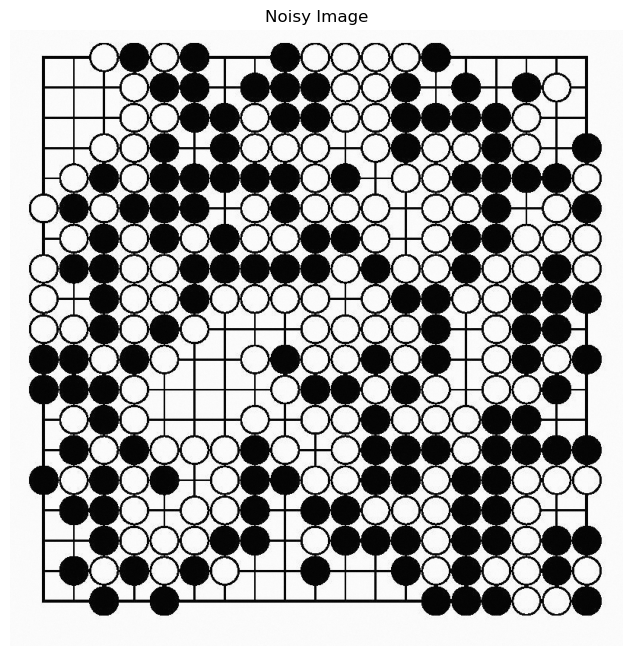

In [23]:
# 添加随机噪声
noise = np.random.normal(0, 0.5, binary_img.shape)
noisy_img = binary_img + noise

# 对带噪声的图像进行SVD分解
U_noisy, S_noisy, VT_noisy = np.linalg.svd(noisy_img, full_matrices=False)

# 使用前k个奇异值恢复带噪声的图像
compressed_noisy_img = np.dot(U_noisy[:, :k], np.dot(np.diag(S_noisy[:k]), VT_noisy[:k, :]))

# 显示带噪声图像
plt.figure(figsize=(8, 8))
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')
plt.show()

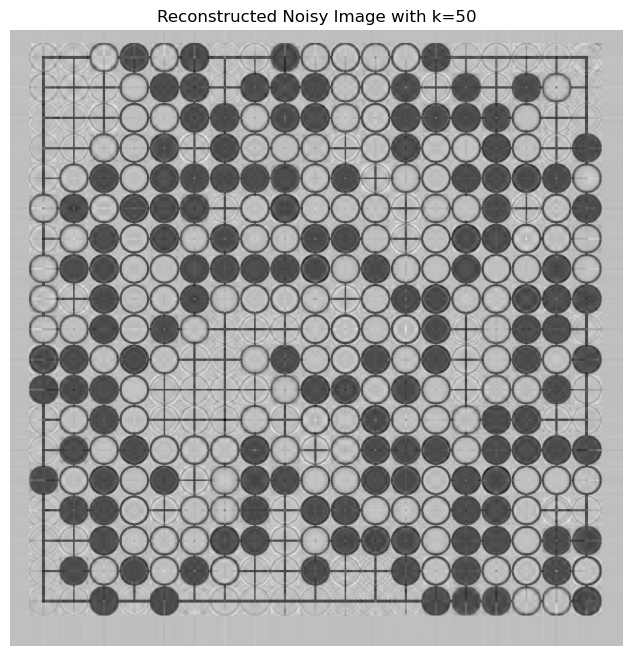

In [22]:
# 显示压缩后恢复的带噪声图像
plt.figure(figsize=(8, 8))
plt.imshow(compressed_noisy_img, cmap='gray')
plt.title(f'Reconstructed Noisy Image with k={k}')
plt.axis('off')
plt.show()